# Abstract

Geometric progressions are often found in nature, and in trade markets. We utilize the geometric progressing of the length of the Bitcoin market cycles to estimate future bull and bear cycle lengths. Intrestingly, the geometric progression indicates that both bear and bull cycles are shortening. It predicts the end of a bull phase in April 2021, followed by a 3 month bear phase. This prediction was shown to be accurate. It further predicts a peak in July 2022, after which the model starts predicitng a bear cycle length tending to 0.

We speculate that the bear cycle length is likely due to the failure of the model. However, if this is not the case, then possibly a large event has led to hyperbitcoinization, leading to only bull cycles. Given the nature of the geometric progression however, this will not last forever, and the bull cycle length will also tend to 0 with time.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ipympl
import numpy as np

# Hypothesis 
Using the extrapolation of the geometric progression of the ratio of the lengths of previous cycles, we can back-calculate a future market cycle peak. 

# Calculations

## Length of prior cycles

The length (in months) of the prior cycles, namely 2010-2011, 2011-2015 and 2015-2019 are fed into a DataFrame. Note that these will be referred to as market cycles 0, 1 and 2 respectively. The length is measured from TradingView bars to ensure consistency (from hereon referred to as months).

Each market cycle is separated into bull and bear phases, as shown on the graph below.

![Prior Cycles](images/BLX_2021-12-29_13-56-02_d9872.png)

In [2]:
df = pd.DataFrame(columns=["Bull", "Bear"])
df.Bull = [8, 23, 34]
df.Bear = [4, 13, 12]

In [3]:
df

,Bull,Bear
0,8,4
1,23,13
2,34,12


## Taking the geometric progression of length ratios

A ratio is built from the previous DataFrame, where the length of the cycle is divided by the length of the preceding cycle. eg. 23/8 = 2.88 and 13/4 = 3.25

In [4]:
df1 = pd.DataFrame(columns=["BullRatio", "BearRatio"], dtype="float64")

df1.loc[0] = (df.iloc[1] / df.iloc[0]).tolist()
df1.loc[1] = (df.loc[2] / df.loc[1]).tolist()

In [5]:
df1.round(2)

,BullRatio,BearRatio
0,2.88,3.25
1,1.48,0.92


### Assumption: The ratio of the lengths follow a geometric progression

$$ GP = a, ar^2, ar^3$$

For the bull cycles we get a constant factor $r = 1.94$

For the bear cycles we get a constant factor $r = 3.53$

## Extrapolating the geometric progression of length ratios

Using the constant factor, we can extrapolate forward

In [6]:
df1.loc[2] = df1.loc[1]**2 / df1.loc[0]
df1.loc[3] = df1.loc[2]**2 / df1.loc[1]

In [7]:
df1.round(2)

,BullRatio,BearRatio
0,2.88,3.25
1,1.48,0.92
2,0.76,0.26
3,0.39,0.07


## Back calculating the lengths

Using the extrapolated geometric progressions we can back-calculate the cycle lengths

In [8]:
df.loc[3] = np.array(df1.loc[2]) * np.array(df.loc[2])
df.loc[4] = np.array(df1.loc[3]) * np.array(df.loc[3])

In [9]:
df.round(0)

,Bull,Bear
0,8.0,4.0
1,23.0,13.0
2,34.0,12.0
3,26.0,3.0
4,10.0,0.0


# Results

The calculations make two predictions: 

1. Cycle 3 is expected to have a bull cycle lasting 26 months from the end of Cycle 2, followed by a 3 month bear cycle
2. Cycle 4 is expected to have a bull cycle lasting 10 months from the end of Cycle 2, followed by a 0 month bear cycle*


The first prediction can be tested, and is shown below. Intrestingly the 26 month bull cycle predicted matches the peak of the cycle quite precisely. The following bear cycle lasting 3 months is also well predicted. Both are shown in the graph below:

![Predicted Cycles](images/BLX_2021-12-29_14-32-48_ba615.png)


The second prediction is interesting, as the peak of the bull cycle is 10 months after the end of the Cycle 3. This puts the peak of Cycle 4 in **July 2022**. This is reasonably in line with predictions made by crypto analyst Ben Cowan who predictions a cycle peak in the later half of 2022/early half of 2023.

## Error Analysis
This prediction is not strong, nor can it be backtested. There simply is not enough data to do so. The only reason why we can consider this somewhwat reasonable is that it accurately predicts the length of the bull cycle peak in April, followed by a bear cycle till August. As a rough estimate one could say an error margin on $\pm 1$ month is reasonable.

Additionally, there is the inherent subjectivity of what is a cycle, for defining prior cycles we have assumed a price bottom to a price top on a closing price basis.

# Additional Data

## Plot of length of markets vs market cycle index

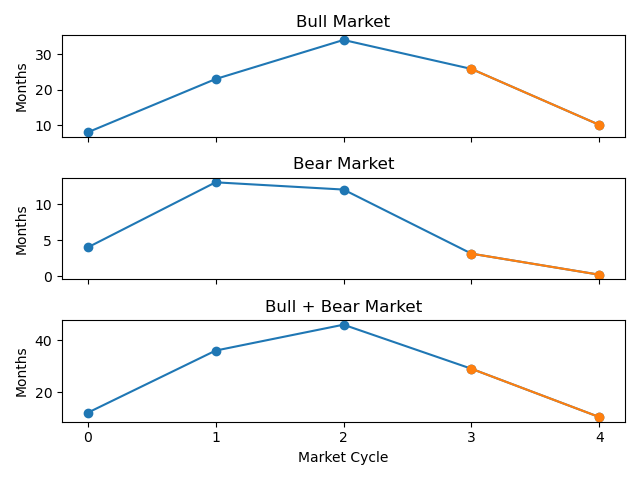

In [10]:
%matplotlib widget
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)

ax1.plot(df.index, df.Bull, "o-")
ax1.plot(df.index[-2:], df.Bull[-2:], "o-")
ax1.set_title("Bull Market")
ax1.set_ylabel("Months")

ax2.plot(df.index, df.Bear, "o-")
ax2.plot(df.index[-2:], df.Bear[-2:], "o-")
ax2.set_ylabel("Months")
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_title("Bear Market")

ax3.plot(df.index, df.Bull + df.Bear, "o-")
ax3.plot(df.index[-2:], (df.Bull + df.Bear)[-2:], "o-")
ax3.set_ylabel("Months")
ax3.set_title("Bull + Bear Market")
ax3.set_xlabel("Market Cycle")

fig.tight_layout()

## Plot of cycle length ratios

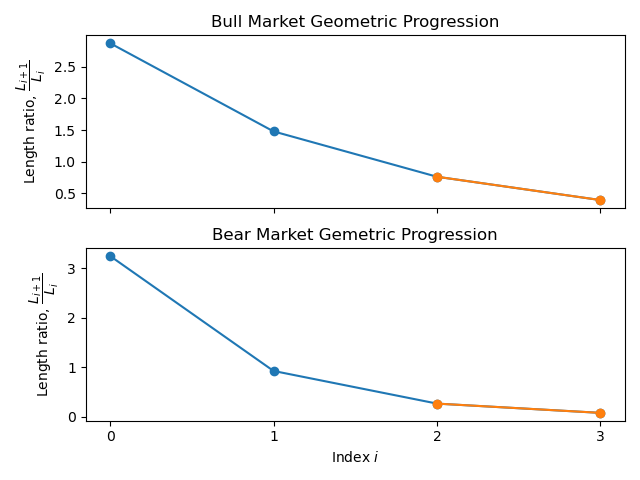

In [11]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(df1.index, df1.BullRatio, "o-")
ax1.plot(df1.index[-2:], df1.BullRatio[-2:], "o-")
ax1.set_title("Bull Market Geometric Progression")
ax1.set_ylabel("Length ratio, $\dfrac{L_{i+1}}{L_{i}}$")

ax2.plot(df1.index, df1.BearRatio, "o-")
ax2.set_xticks([0, 1, 2, 3])
ax2.plot(df1.index[-2:], df1.BearRatio[-2:], "o-")
ax2.set_ylabel("Length ratio, $\dfrac{L_{i+1}}{L_{i}}$")
ax2.set_xlabel("Index $i$")
ax2.set_title("Bear Market Gemetric Progression")

fig.tight_layout()